# Simple Linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams ['figure.figsize'] = 10,8

In [ ]:
# Rooms variables
rooms = 2 * np.random.randn(100,1)+3

rooms[0:10]

array([[2.42839464],
       [4.80327866],
       [0.88021267],
       [4.3334948 ],
       [3.55826986],
       [4.88545219],
       [0.58192189],
       [5.60497198],
       [3.68691293],
       [4.31873029]])

In [ ]:
# Price variables
price = 265 + 6 * rooms + abs(np.random.randn(100,1))

price[0:10]

array([[279.62508552],
       [294.61376276],
       [270.85278079],
       [292.64005195],
       [287.05259145],
       [294.86466306],
       [269.63427445],
       [299.04896663],
       [287.84185894],
       [291.25901196]])

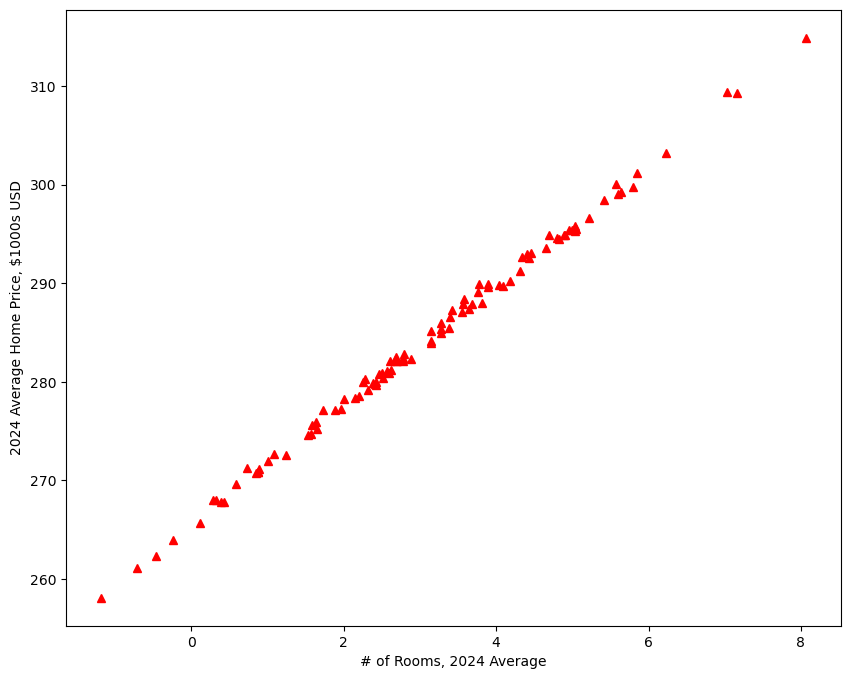

In [10]:
# scatterplot
plt.plot (rooms,price, 'r^') # r^ is specify point plot should be generate instead of defulte line plot
plt.xlabel ('# of Rooms, 2024 Average')
plt.ylabel ('2024 Average Home Price, $1000s USD')

plt.show()

 As the number of rooms increase the price oh the homes increase

In [11]:
X = rooms
y = price

LinReg = LinearRegression()
# fit model to data
LinReg.fit(X, y)

# In order to evaluate how well this model perfoms, we need the intercept and the coefficient
print (LinReg.intercept_, LinReg.coef_)

[265.63515063] [[6.05242938]]


*Simple Algebra*
- y = mx + b
- b = intercept = 265.63

*Estimated Coefficients*
- LinReg.coef_ = [6.05] Estimated coefficients for the terms in the linear regression problem.

In [13]:
print (LinReg.score(X, y))

# score function returns the coefficient of determination which is our score of prediction


0.9975712627768356


it shows our model perfomes very well and R squared value is close to 1

# Multiple linear regression